In [1]:
import pandas as pd

In [2]:
import numpy as np

In [52]:
import os

In [ ]:
path = os.getenv('parity_path')

##### Download and format data

In [4]:
nfl = pd.read_csv(path + 'NFL/nfl.csv')
nfl = nfl[nfl['season'].isin(range(2010, 2020)) & (nfl['playoff'].isna())]

# define winner column
nfl['winner'] = 'na'

nfl.loc[nfl['score1'] > nfl['score2'], 'winner'] = nfl['team1']
nfl.loc[nfl['score1'] < nfl['score2'], 'winner'] = nfl['team2']

# define participation column
nfl['teams'] = nfl['team1'] + " - " + nfl['team2']

In [5]:
nhl = pd.read_csv(path + 'NHL/nhl.csv')

nhl['season'] = nhl['season'].astype(str).str[4:].astype(int)
nhl = nhl[(nhl['type'] == 'R') & nhl['season'].isin(range(2010, 2020))]

nhl['home_team_id'] = nhl['home_team_id'].astype(str)
nhl['away_team_id'] = nhl['away_team_id'].astype(str)

# fix teams that changed names
nhl.loc[nhl['home_team_id'] == '11', 'home_team_id'] = '52'
nhl.loc[nhl['away_team_id'] == '11', 'away_team_id'] = '52'
nhl.loc[nhl['home_team_id'] == '27', 'home_team_id'] = '53'
nhl.loc[nhl['away_team_id'] == '27', 'away_team_id'] = '53'

# define winner column
nhl['winner'] = 'na'

nhl.loc[nhl['home_goals'] > nhl['away_goals'], 'winner'] = nhl['home_team_id']
nhl.loc[nhl['home_goals'] < nhl['away_goals'], 'winner'] = nhl['away_team_id']

# define participation column
nhl['teams'] = "_" + nhl['away_team_id'] + "_ - _" + nhl['home_team_id'] + "_"

In [6]:
mlb = pd.read_csv(path + 'MLB/mlb.csv')
mlb = mlb[mlb['season'].isin(range(2010, 2020)) & (mlb['playoff'].isna())]

# define winner column
mlb['winner'] = 'na'

mlb.loc[mlb['score1'] > mlb['score2'], 'winner'] = mlb['team1']
mlb.loc[mlb['score1'] < mlb['score2'], 'winner'] = mlb['team2']

# define participation column
mlb['teams'] = mlb['team1'] + " - " + mlb['team2']

In [7]:
nba = pd.read_csv(path + 'NBA/nba.csv')
nba = nba[nba['season'].isin(range(2010, 2020)) & (nba['playoff'].isna())]

nba.loc[nba['team1'] == 'NJN', 'team1'] = 'BRK'
nba.loc[nba['team2'] == 'NJN', 'team2'] = 'BRK'

# define winner
nba['winner'] = 'na'
nba.loc[nba['score1'] > nba['score2'], 'winner'] = nba['team1']
nba.loc[nba['score1'] < nba['score2'], 'winner'] = nba['team2']

# define participation column
nba['teams'] = nba['team1'] + " - " + nba['team2']

##### Aggregate each teams wins through each game in the season

In [8]:
nfl_wins = pd.DataFrame(columns = ['Team', 'Year'] + ('G' + pd.DataFrame((np.arange(16) + 1).astype(str)))[0].tolist()).astype(int)

for year in range(2010, 2020):   
    for team in nfl['team1'].value_counts().index:
        try:
            match = (nfl['season'] == year) & (nfl['teams'].str.contains(team))

            # nfl is the only league where we have to account for ties
            temp = pd.DataFrame(((nfl[match]['winner'] == team) + (nfl[match]['winner'] == 'na')/2).cumsum())[:16].T
            temp.columns = ('G' + pd.DataFrame((np.arange(16) + 1).astype(str)))[0].tolist()

            temp['Team'] = team
            temp['Year'] = year

            nfl_wins = nfl_wins.append(temp, sort=False).reset_index(drop=True)
            
        except(ValueError):
            continue

In [9]:
nhl_wins = pd.DataFrame(columns = ['Team', 'Year'] + ('G' + pd.DataFrame((np.arange(82) + 1).astype(str)))[0].tolist()).astype(int)

for year in range(2010, 2020):   
    for team in nhl['home_team_id'].value_counts().index:
        try:
            match = (nhl['season'] == year) & (nhl['teams'].str.contains('_' + str(team) + '_'))

            temp = pd.DataFrame((nhl[match]['winner'] == team).cumsum())[:82].T
            temp.columns = ('G' + pd.DataFrame((np.arange(82) + 1).astype(str)))[0].tolist()

            temp['Team'] = team
            temp['Year'] = year

            nhl_wins = nhl_wins.append(temp, sort=False).reset_index(drop=True)
            
        except(ValueError):
            continue

In [10]:
mlb_wins = pd.DataFrame(columns = ['Team', 'Year'] + ('G' + pd.DataFrame((np.arange(162) + 1).astype(str)))[0].tolist()).astype(int)

for year in range(2010, 2020):   
    for team in mlb['team1'].value_counts().index:
        try:
            match = (mlb['season'] == year) & (mlb['teams'].str.contains(team))

            temp = pd.DataFrame((mlb[match]['winner'] == team).cumsum())[:162].T
            temp.columns = ('G' + pd.DataFrame((np.arange(162) + 1).astype(str)))[0].tolist()

            temp['Team'] = team
            temp['Year'] = year

            mlb_wins = mlb_wins.append(temp, sort=False).reset_index(drop=True)
            
        except(ValueError):
            continue

In [11]:
nba_wins = pd.DataFrame(columns = ['Team', 'Year'] + ('G' + pd.DataFrame((np.arange(82) + 1).astype(str)))[0].tolist()).astype(int)

for year in range(2010, 2020):   
    for team in nba['team1'].value_counts().index:
        try:
            match = (nba['season'] == year) & (nba['teams'].str.contains(team))

            temp = pd.DataFrame((nba[match]['winner'] == team).cumsum())[:82].T
            temp.columns = ('G' + pd.DataFrame((np.arange(82) + 1).astype(str)))[0].tolist()

            temp['Team'] = team
            temp['Year'] = year

            nba_wins = nba_wins.append(temp, sort=False).reset_index(drop=True)
            
        except(ValueError):
            continue

##### Visualize R-squared throughout the season

R-squared here is equivalent to Pearson's R ^2

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 110

In [14]:
nfl_r = nfl_wins.drop(columns=['Team', 'Year']).corr(method='pearson')**2

In [15]:
nhl_r = nhl_wins.drop(columns=['Team', 'Year']).corr(method='pearson')**2

In [16]:
mlb_r = mlb_wins.drop(columns=['Team', 'Year']).corr(method='pearson')**2

In [17]:
nba_r = nba_wins.drop(columns=['Team', 'Year']).corr(method='pearson')**2

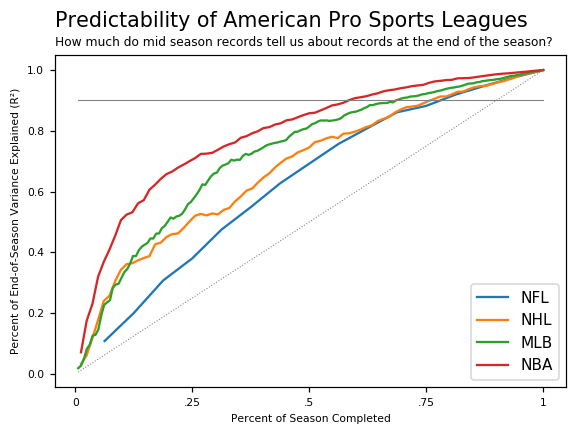

In [51]:
# Plot lines for each league
plt.plot(np.arange(1, 17)/16,   nfl_r['G16'],  linewidth=1.5, color='C0')
plt.plot(np.arange(1, 83)/82,   nhl_r['G82'],  linewidth=1.5, color='C1')
plt.plot(np.arange(1, 163)/162, mlb_r['G162'], linewidth=1.5, color='C2')
plt.plot(np.arange(1, 83)/82,   nba_r['G82'],  linewidth=1.5, color='C3')

# Plot guidelines
plt.plot(np.arange(1, 163)/162, np.arange(1, 163)/162, linestyle=':', linewidth=.7, color='grey')
plt.plot(np.arange(1, 163)/162, np.ones(162)*.9, linewidth=.7, color='grey')

# Format labels and axes
plt.xticks(np.arange(0, 5)/4, labels=['0', '.25', '.5', '.75', '1'], fontsize=7)
plt.yticks(fontsize=7)
plt.legend(['NFL', 'NHL', 'MLB', 'NBA'])

plt.xlabel('Percent of Season Completed', fontsize=7)
plt.ylabel('Percent of End-of-Season Variance Explained (R²)', fontsize=7)
plt.suptitle('Predictability of American Pro Sports Leagues', fontsize=13.5, horizontalalignment='left', x=.125)
plt.title('How much do mid season records tell us about records at the end of the season?', fontsize=8, loc='left')

plt.savefig(path + str('plot'))

When does each league cross the 90% threshold?

In [19]:
print('NFL: ' + nfl_r[nfl_r['G16']>.9].index[0] + ' - ' + str(round(((16 - len(nfl_r[nfl_r['G16']>.9]['G16']))/16)*100)) + '%')
print('NHL: ' + nhl_r[nhl_r['G82']>.9].index[0] + ' - ' + str(round(((82 - len(nhl_r[nhl_r['G82']>.9]['G82']))/82)*100)) + '%')
print('MLB: ' + mlb_r[mlb_r['G162']>.9].index[0] + ' - ' + str(round(((162 - len(mlb_r[mlb_r['G162']>.9]['G162']))/162)*100)) + '%')
print('NBA: ' + nba_r[nba_r['G82']>.9].index[0] + ' - ' + str(round(((82 - len(nba_r[nba_r['G82']>.9]['G82']))/82)*100)) + '%')

NFL: G13 - 75%
NHL: G63 - 76%
MLB: G111 - 68%
NBA: G48 - 57%


##### How do these compare to a season simulated to have NO parity?

In [20]:
# Define a league of 30 teams
n = 30
teams = np.arange(0, n)
sim_wins = pd.DataFrame(columns = ['Team', 'Year'] + ('G' + pd.DataFrame(np.arange(1, n).astype(str)))[0].tolist())

for year in range(2010, 2020):

    # set a random schedule each season
    sch = np.random.choice(teams, n, replace=False)

    # according to the 'circle' algorithm for round robin tournaments:
    # one team will be fixed in place while the other 29 will rotate
    fix = sch[0]
    rot = np.delete(sch, 0)

    seas = pd.DataFrame(index=np.arange(0, n))

    # Iterate through all n-1 weeks
    for i in range(0, n-1):

        # Iterate through every matchup with the 'circle' algorithm
        away = np.append(fix, np.roll(rot, i)[0:int(n/2-1)])
        home = np.flip(np.roll(rot, i)[int(n/2-1):n-1])

        # Record the winners from each iteration
        winners = np.zeros(n)
        winners[np.maximum(away, home)] = 1

        results = pd.DataFrame(winners, columns=['G' + str(i + 1)])

        # Join the weekly results to the rest of the data
        seas = seas.join(results)
        
    # get a weekly total of each teams wins and append it to the main dataframe
    sums = seas.cumsum(axis=1)
    
    sums['Team'] = np.arange(0, n)
    sums['Year'] = str(year)
    
    sim_wins = sim_wins.append(sums, sort=False)

In [21]:
sim_r = sim_wins.drop(columns=['Team', 'Year']).corr(method='pearson')**2

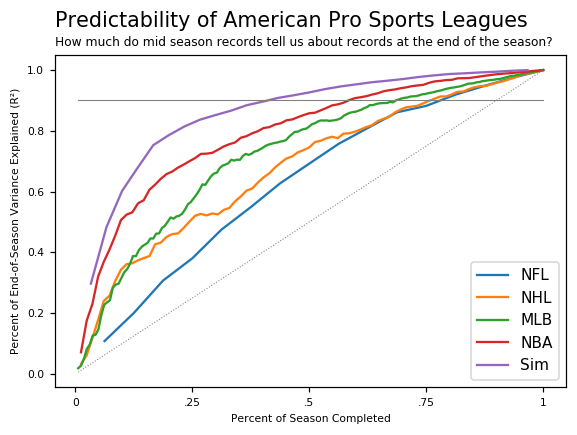

In [50]:
# Plot lines for each league
plt.plot(np.arange(1, 17)/16,   nfl_r['G16'],  linewidth=1.5, color='C0')
plt.plot(np.arange(1, 83)/82,   nhl_r['G82'],  linewidth=1.5, color='C1')
plt.plot(np.arange(1, 163)/162, mlb_r['G162'], linewidth=1.5, color='C2')
plt.plot(np.arange(1, 83)/82,   nba_r['G82'],  linewidth=1.5, color='C3')
plt.plot(np.arange(1, n)/n,   sim_r['G{}'.format(n-1)],  linewidth=1.5, color='C4')

# Plot guidelines
plt.plot(np.arange(1, 163)/162, np.arange(1, 163)/162, linestyle=':', linewidth=.7, color='grey')
plt.plot(np.arange(1, 163)/162, np.ones(162)*.9, linewidth=.7, color='grey')

# Format labels and axes
plt.xticks(np.arange(0, 5)/4, labels=['0', '.25', '.5', '.75', '1'], fontsize=7)
plt.yticks(fontsize=7)
plt.legend(['NFL', 'NHL', 'MLB', 'NBA', 'Sim'])

plt.xlabel('Percent of Season Completed', fontsize=7)
plt.ylabel('Percent of End-of-Season Variance Explained (R²)', fontsize=7)
plt.suptitle('Predictability of American Pro Sports Leagues', fontsize=13.5, horizontalalignment='left', x=.125)
plt.title('How much do mid season records tell us about records at the end of the season?', fontsize=8, loc='left')

plt.savefig(path + str('bonus_plot'))

##### Aggregate by season, so we can compare across seasons

In [24]:
nfl_recs = pd.DataFrame(columns=['Team', 'Year', 'y1', 'y2'])

for year in range(2010, 2019):
    
    cur = nfl_wins[nfl_wins['Year'] == year][['Team', 'Year', 'G16']].rename(columns={'G16': 'y1'}).\
            merge(nfl_wins[nfl_wins['Year'] == year + 1][['Team', 'G16']].rename(columns={'G16': 'y2'}), how='left')
    
    nfl_recs = nfl_recs.append(cur, sort=False).reset_index(drop=True)
    
nfl_recs['y1'] = pd.to_numeric(nfl_recs['y1'])
nfl_recs['y2'] = pd.to_numeric(nfl_recs['y2'])

In [25]:
nhl_recs = pd.DataFrame(columns=['Team', 'Year', 'y1', 'y2'])

for year in range(2010, 2019):
    
    cur = nhl_wins[nhl_wins['Year'] == year][['Team', 'Year', 'G82']].rename(columns={'G82': 'y1'}).\
            merge(nhl_wins[nhl_wins['Year'] == year + 1][['Team', 'G82']].rename(columns={'G82': 'y2'}), how='left')
    
    nhl_recs = nhl_recs.append(cur, sort=False).reset_index(drop=True)
    
nhl_recs['y1'] = pd.to_numeric(nhl_recs['y1'])
nhl_recs['y2'] = pd.to_numeric(nhl_recs['y2'])

In [26]:
mlb_recs = pd.DataFrame(columns=['Team', 'Year', 'y1', 'y2'])

for year in range(2010, 2019):
    
    cur = mlb_wins[mlb_wins['Year'] == year][['Team', 'Year', 'G162']].rename(columns={'G162': 'y1'}).\
            merge(mlb_wins[mlb_wins['Year'] == year + 1][['Team', 'G162']].rename(columns={'G162': 'y2'}), how='left')
    
    mlb_recs = mlb_recs.append(cur, sort=False).reset_index(drop=True)
    
mlb_recs['y1'] = pd.to_numeric(mlb_recs['y1'])
mlb_recs['y2'] = pd.to_numeric(mlb_recs['y2'])

In [27]:
nba_recs = pd.DataFrame(columns=['Team', 'Year', 'y1', 'y2'])

for year in range(2010, 2019):
    
    cur = nba_wins[nba_wins['Year'] == year][['Team', 'Year', 'G82']].rename(columns={'G82': 'y1'}).\
            merge(nba_wins[nba_wins['Year'] == year + 1][['Team', 'G82']].rename(columns={'G82': 'y2'}), how='left')
    
    nba_recs = nba_recs.append(cur, sort=False).reset_index(drop=True)
    
nba_recs['y1'] = pd.to_numeric(nba_recs['y1'])
nba_recs['y2'] = pd.to_numeric(nba_recs['y2'])

##### What does the parity look like if we compare across seasons?

In [28]:
import statsmodels.formula.api as sm

In [31]:
print('NFL R² between consecutive seasons: ' + str(round(nfl_recs.corr(method='pearson').iloc[0, 1]**2, 4)))

NFL R² between consecutive seasons: 0.1171


Int: 5.245974458634091
Slope: 0.3442531926707386


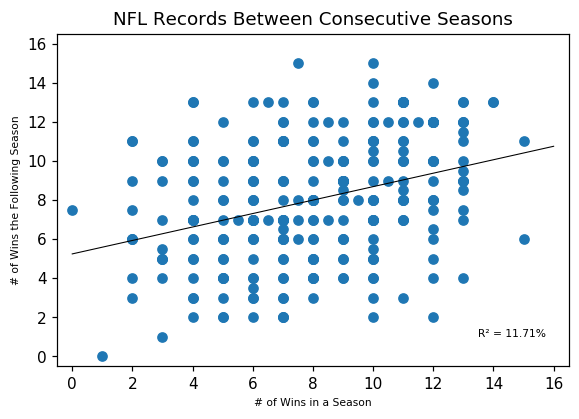

In [39]:
# Calculate regression line
[b, m] = sm.ols(formula="y2 ~ y1", data=nfl_recs).fit().params.tolist()

print('Int: ' + str(b))
print('Slope: ' + str(m))

# Plot points and regression line
plt.scatter(data=nfl_recs, x='y1', y='y2', color='C0')
plt.plot(np.arange(0, 17), b + np.arange(0, 17)*m, linewidth=.7, color='black')

# Format labels and axes
plt.xlim(-.5, 16.5)
plt.ylim(-.5, 16.5)

plt.xlabel('# of Wins in a Season', fontsize=7)
plt.ylabel('# of Wins the Following Season', fontsize=7)
plt.title('NFL Records Between Consecutive Seasons')
plt.annotate('R² = 11.71%', (13.5, 1), size=7)

plt.savefig(path + str('nfl'))

In [42]:
print('NHL R² between consecutive seasons: ' + str(round(nhl_recs.corr(method='pearson').iloc[0, 1]**2, 4)))

NHL R² between consecutive seasons: 0.1915


Int: 23.36370424056631
Slope: 0.42880602782071076


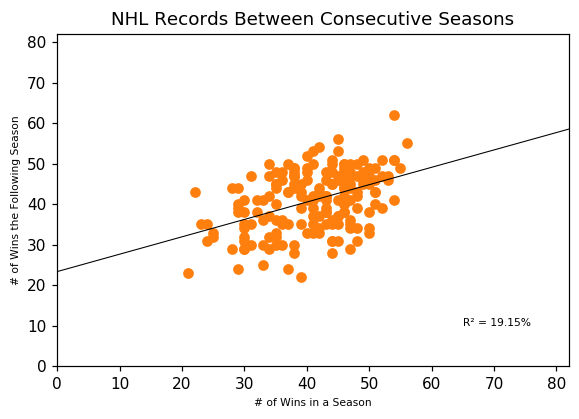

In [44]:
# Calculate regression line
[b, m] = sm.ols(formula="y2 ~ y1", data=nhl_recs).fit().params.tolist()

print('Int: ' + str(b))
print('Slope: ' + str(m))

# Plot points and regression line
plt.scatter(data=nhl_recs, x='y1', y='y2', color='C1')
plt.plot(np.arange(0, 83), b + np.arange(0, 83)*m, linewidth=.7, color='black')

# Format labels and axes
plt.xlim(0, 82)
plt.ylim(0, 82)

plt.xlabel('# of Wins in a Season', fontsize=7)
plt.ylabel('# of Wins the Following Season', fontsize=7)
plt.title('NHL Records Between Consecutive Seasons')
plt.annotate('R² = 19.15%', (65, 10), size=7)

plt.savefig(path + str('nhl'))

In [45]:
print('MLB R² between consecutive seasons: ' + str(round(mlb_recs.corr(method='pearson').iloc[0, 1]**2, 4)))

MLB R² between consecutive seasons: 0.2639


Int: 38.30949200422381
Slope: 0.5287975510889088


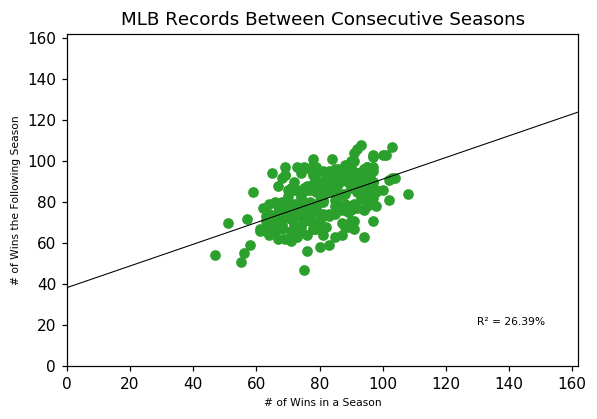

In [46]:
# Calculate regression line
[b, m] = sm.ols(formula="y2 ~ y1", data=mlb_recs).fit().params.tolist()

print('Int: ' + str(b))
print('Slope: ' + str(m))

# Plot points and regression line
plt.scatter(data=mlb_recs, x='y1', y='y2', color='C2')
plt.plot(np.arange(0, 163), b + np.arange(0, 163)*m, linewidth=.7, color='black')

# Format labels and axes
plt.xlim(0, 162)
plt.ylim(0, 162)

plt.xlabel('# of Wins in a Season', fontsize=7)
plt.ylabel('# of Wins the Following Season', fontsize=7)
plt.title('MLB Records Between Consecutive Seasons')
plt.annotate('R² = 26.39%', (130, 20), size=7)

plt.savefig(path + str('mlb'))

In [47]:
print('NBA R² between consecutive seasons: ' + str(round(nba_recs.corr(method='pearson').iloc[0, 1]**2, 4)))

NBA R² between consecutive seasons: 0.3971


Int: 15.600823873167357
Slope: 0.6202639552038021


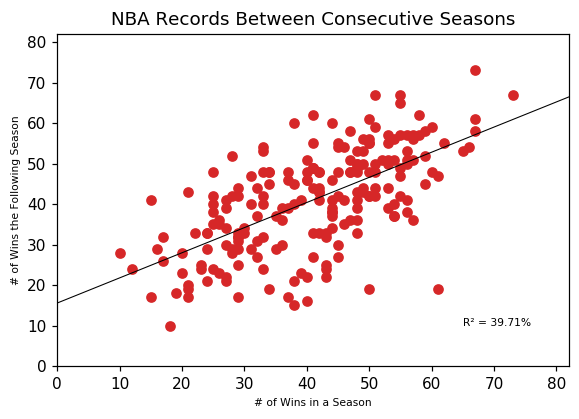

In [48]:
# Calculate regression line
[b, m] = sm.ols(formula="y2 ~ y1", data=nba_recs).fit().params.tolist()

print('Int: ' + str(b))
print('Slope: ' + str(m))

# Plot points and regression line
plt.scatter(data=nba_recs, x='y1', y='y2', color='C3')
plt.plot(np.arange(0, 83), b + np.arange(0, 83)*m, linewidth=.7, color='black')

# Format labels and axes
plt.xlim(0, 82)
plt.ylim(0, 82)

plt.xlabel('# of Wins in a Season', fontsize=7)
plt.ylabel('# of Wins the Following Season', fontsize=7)
plt.title('NBA Records Between Consecutive Seasons')
plt.annotate('R² = 39.71%', (65, 10), size=7)

plt.savefig(path + str('nba'))